<a href="https://colab.research.google.com/github/LamnidarMuharamsah/MiniProject_penjualanCabangSupermarket/blob/main/Miniproject_EDA__Dqlab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Baca CSV File
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")

#Info Dataframe
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [3]:
# Median price yang dibayar customer dari masing-masing metode pembayaran.
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

payment_type
credit card        2587500.0
debit card         2621500.0
e-wallet           2589000.0
virtual account    2643000.0
Name: price, dtype: float64


In [5]:
# Ubah freight_value menjadi shipping_cost dan cari shipping_cost
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
sort_value.shipping_cost

23829    200000
12011    200000
10984    200000
29722    200000
15259    200000
          ...  
2891       9000
36815      9000
8175       9000
4034       9000
32994      9000
Name: shipping_cost, Length: 49999, dtype: int64

In [6]:
# Untuk product_category_name, berapa rata-rata weight produk tersebut
# dan standar deviasi mana yang terkecil dari weight tersebut,
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())

product_category_name
beauty         2120.088396
automotive     2129.559039
electronics    2144.751191
toys           2203.863643
gadget         2229.632942
fashion        2246.516901
sports         2251.879909
utilities      2291.029868
Name: product_weight_gram, dtype: float64
product_category_name
automotive     3799.884166
beauty         3837.474929
electronics    3839.271768
fashion        3858.885213
gadget         3955.792741
toys           3956.814749
sports         4032.850044
utilities      4150.509909
Name: product_weight_gram, dtype: float64


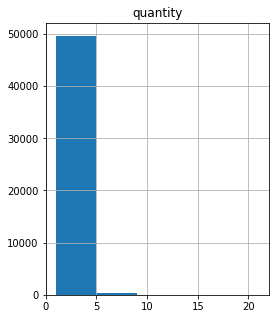

In [7]:
# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()